# Least Squares Minimization with `scipy.optimize.leastsq`

So far we have only considered functional relationships that are linear in the unknown constants. Non-linear cases are far more complicated and generally require numerical solutions. We will use a function from the SciPy module [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html), which contains functions for minimization, least squares and root finding techniques.

## An Example of a Nonlinear Model

Consider the data found in the data file **nonlinear_data.csv** on [GitHub](https://raw.githubusercontent.com/maystey/uct_nassp_cm/gh-pages/regression/data/nonlinear_data.csv) , plotted below:

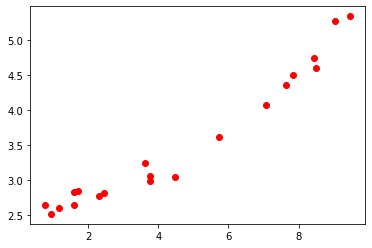

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Generating data, be sure to remove this cell and use the data file

#Functional relation
def f(a, x):
    return a[0] + a[1] * np.exp(a[2] * x)

#Parameters
a = [2, 0.5, 0.2]
N = 20
xlims = [0, 10]
sigma_y = 0.15

#Random data
xdata = np.random.uniform(xlims[0], xlims[1], N)
ydata = np.random.normal(loc = f(a, xdata), scale = sigma_y)

#Writing
np.savetxt('data/nonlinear_data.csv', np.array((xdata, ydata)).T, header = 'x,y', delimiter = ',')

#Plotting
plt.plot(xdata, ydata, 'ro')
plt.show()

Though the data may appear to follow a linear trend, this is not the case. Consider the linear fit below:

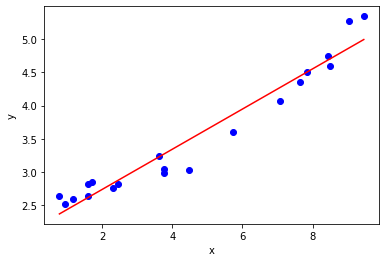

In [10]:
from scipy.optimize import leastsq
import numpy as np
import matplotlib.pyplot as plt

#Remove input

def lin_f(a,x):
    return a[0] + a[1]*x

def lin_err(a, x, y):
    return lin_f(a, x) - y

a0 = [1.5, 0.2]

a, success = leastsq(lin_err, a0, args = (xdata, ydata))

#Plotting the fit and data
x = np.linspace(xdata.min(), xdata.max(), 1000)

plt.plot(xdata, ydata, 'bo')
plt.plot(x, lin_f(a, x), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Instead a more appropriate functional relation is an exponential function:

$$
y = a_0 + a_1 e^{a_2 x}
$$

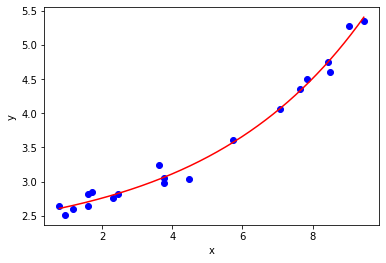

In [11]:
#Model
def f(a, x):
    return a[0] + a[1] * np.exp(a[2] * x)

#Residuals (in this case the error term)
def err(a, x, y):
    return f(a, x) - y

#Reading the data

#Performing the fit
a0 = [1.5, 0.6, 0.2] #initial guess

a, success = leastsq(err, a0, args = (xdata, ydata))

#Plotting the fit and data
x = np.linspace(xdata.min(), xdata.max(), 1000)

plt.plot(xdata, ydata, 'bo')
plt.plot(x, f(a, x), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Note that this functional relation is non-linear in $a_2$. Applying the method of least squares minimization to this functional relation will not yield an analytic solution, therefore a numerical method is required. We shall not be implementing this numerical method ourselves, instead using a function from **SciPy** to solve our problem. In short the numerical minimization technique involves following the negative gradient (or an approximation of this) from a given starting point, until a local minimum is found (essentially the solution is captured here).

<!---
Include a visual analogy of a ball rolling down a surface
--->

The trouble with trying to use least squares on this **non-linear** functional relation ...

$$
\begin{align*}
\frac{\partial S^2}{\partial a_2} = \sum_{i = 1}^{N} 2 x_i \left(a_0 + a_1 e^{a_2 x_i} \right) & = 0\\
\therefore a_0 \langle{x}\rangle + a_1 \left\langle{x e^{a_2 x}}\right\rangle & = 
\end{align*}
$$

## Nonlinear Least Squares Minimization with `scipy.optimize.leastsq`

The SciPy module [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) contains functions for minimization, least squares and root finding techniques. Of particular interest to us now is the `leastsq` function (documentation [here](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.leastsq.html)), which we shall use to perform nonlinear least squares minimization.

The call signature of `leastsq`, including only the arguments of immediate interest to us, is:

```python
leastsq(func, x0, args = () )
```

The `x0` argument is an initial guess for the unknown parameters we are trying to find (required by the numerical minimization technique). In our case this is an initial case of the $a_j$ constants.

The keyword argument `args` is a tuple of the variables or data we are fitting the model to. In our case $x$ and $y$. The order in which these variables are presented is up to you, but must correspond to the order they are used in `fun`. Each element of this tuple should be an array or list of data points, for instance `(xdata, ydata)`.

The `func` argument is a callable object (function). It is referred to as the residual. It is the sum of the residuals squared that will be minimized.For the sum of errors squared the residual is equivalent to our error terms ($\epsilon_i$). 

<!---
Mention that the sum of errors squared is called the objective function
--->

$$
S^2 = \sum_{i = 1}^{N} \text{func(arguments)}^2
$$


The call signature of `func` is:

```python
func(params, *args)
```

where `params` is a list or array of the parameters we are trying to find ($a_j$), and `args` is the tuple of the data for our variables ($x$ and $y$).

The `*` operator before a sequence data structure in a function argument unpacks that data structure as if each element where entered into the function individually. For example `f( *(x,y,z) )` is equivalent to `f(x, y, z)`

The return value of the `leastsq` function (if it is only given the arguments listed above) is a tuple containing the solution for the $a_j$ and an integer flag (for which a value between 1 and 4 indicates the solution was found).

Putting this all together, we can solve the problem from above:

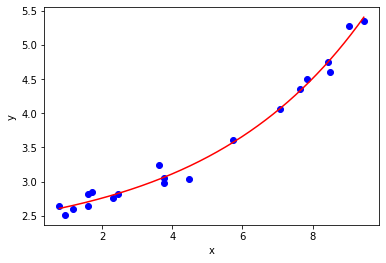

In [51]:
import numpy as np
import matplotlib.pyplot as plt

#importing scipy.optimize.leastsq only
from scipy.optimize import leastsq

#The model to fit to the data
def f(a, x):
    return a[0] + a[1] * np.exp(a[2] * x)

#Residuals (in this case the error term)
def err(a, x, y):
    return f(a, x) - y

#Reading the data
# The `unpack` keyword argument seperates the columns into individual arrays 
xdata, ydata = np.loadtxt('data/nonlinear_data.csv', delimiter = ',', unpack = True) 

#Performing the fit
a0 = [1.5, 0.6, 0.2] #initial guess

a, success = leastsq(err, a0, args = (xdata, ydata))

#Plotting the fit and data
x = np.linspace(xdata.min(), xdata.max(), 1000)

plt.plot(xdata, ydata, 'bo')
plt.plot(x, f(a, x), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Solutions Converging on Local Minima

As mentioned before, the numerical algorithm is complete once it has minimized the objective function (the sum of errors squared in out case) to a **local minimum**. It is possible for the solution to not represent the global minimum, which is the ideal solution to obtain.

Let's take a relatively simple example to illustrate this. Consider the functional relation:

$$
y = a_0 + a_1 e^{-a_2 x} \sin(a_3 x)
$$

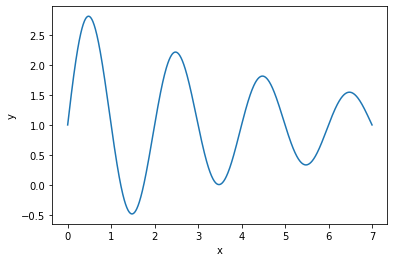

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def f_sin(a, x):
    return a[0] + a[1] * np.exp(-a[2] * x) * np.sin(a[3] * x)

def err_sin(a, x, y):
    return y - f_sin(a, x)


x_arr = np.linspace(0, 7, 1000)
a = [1, 2, 0.2, np.pi]

fig, ax = plt.subplots()

ax.plot(x_arr, f_sin(a, x_arr))
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Given a set of data characterized by this relation:

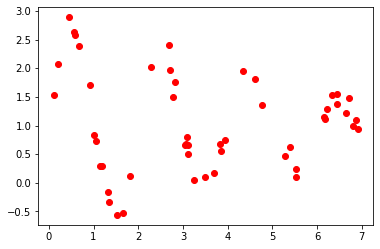

In [19]:
#data

#Parameters
a = [1, 2, 0.2, np.pi]
N = 50
xlims = [0, 7]
sigma_y = 0.15

#Random data
xdata = np.random.uniform(xlims[0], xlims[1], N)
ydata = np.random.normal(loc = f_sin(a, xdata), scale = sigma_y)

#Writing
#np.savetxt('data/nonlinear_sine.csv', np.array((xdata, ydata)).T, header = 'x,y', delimiter = ',')

#Plotting
plt.plot(xdata, ydata, 'ro')
plt.show()

It is relatively easy to find a good fit using `leastsq`:

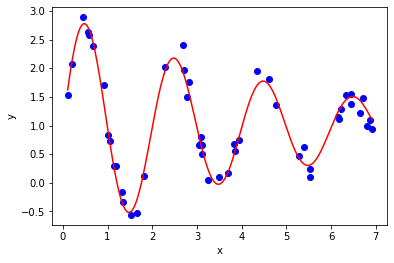

In [33]:
a0 = [1, 2.5, 0.2 , 2]

xdata, ydata = np.loadtxt('data/nonlinear_sine.csv', delimiter = ',', unpack = True)

a,s = leastsq(err_sin, a0, args = (xdata, ydata))

x_arr = np.linspace(xdata.min(), xdata.max(), 1000)

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'bo')
ax.plot(x_arr, f_sin(a, x_arr), 'r-')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Here are a couple of examples of solutions that returns a supposedly successful solution, but have obviously not converged to the best fit.

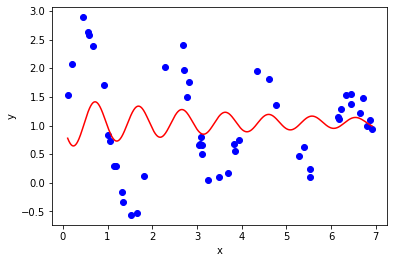

In [31]:
a0 = [1, 2.5, 0.2 , 6]

xdata, ydata = np.loadtxt('data/nonlinear_sine.csv', delimiter = ',', unpack = True)

a,s = leastsq(err_sin, a0, args = (xdata, ydata))

x_arr = np.linspace(xdata.min(), xdata.max(), 1000)

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'bo')
ax.plot(x_arr, f_sin(a, x_arr), 'r-')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

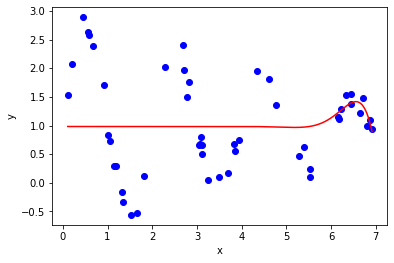

In [50]:
a0 = [1, 2.5, -1.3 , 2]

xdata, ydata = np.loadtxt('data/nonlinear_sine.csv', delimiter = ',', unpack = True)

a,s = leastsq(err_sin, a0, args = (xdata, ydata))

x_arr = np.linspace(xdata.min(), xdata.max(), 1000)

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'bo')
ax.plot(x_arr, f_sin(a, x_arr), 'r-')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Here is an example of a solution that has not succeded (returned an integer flag greater than 4):

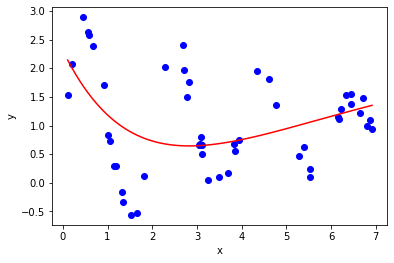

In [46]:
a0 = [1, 2.5, 0.2 , 1.17]

xdata, ydata = np.loadtxt('data/nonlinear_sine.csv', delimiter = ',', unpack = True)

a,s = leastsq(err_sin, a0, args = (xdata, ydata))

x_arr = np.linspace(xdata.min(), xdata.max(), 1000)

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'bo')
ax.plot(x_arr, f_sin(a, x_arr), 'r-')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

If your model does not fit, try varying the initial guess for the fit parameters.